In [ ]:
# Imports necesarios
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


In [ ]:
## Define path data
COLUMNS = ['latitude','longitude','room_type', 'accommodates', 'bathrooms',
           'bedrooms', 'beds', 'amenities','price',  'minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD', 'Wifi', 'TV', 'Parking','Kitchen', 'Washer', 'Refrigerator']
### Define continuous list
cuanti  = [ 'accommodates', 'bathrooms',
           'bedrooms', 'beds','minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD']
### Define categorical list
cuali = ['room_type','Wifi', 'TV', 'Parking','Kitchen', 'Washer', 'Refrigerator']
 
## Prepare the data
features = ['latitude','longitude','room_type', 'accommodates', 'bathrooms',
           'bedrooms', 'beds', 'amenities','price',  'minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD', 'Wifi', 'TV', 'Parking','Kitchen', 'Washer', 'Refrigerator']

 
ds=pd.read_csv("listas.csv")
ds[cuanti] =ds[cuanti].astype('float64')
del ds["Unnamed: 0"]
ds.isna().sum()

latitude             0
longitude            0
room_type            0
accommodates         0
bathrooms            0
bedrooms             0
beds                 0
amenities            0
price                0
minimum_nights       0
maximum_nights       0
reviews_per_month    0
AirportD             0
Wifi                 0
TV                   0
Parking              0
Kitchen              0
Washer               0
Refrigerator         0
dtype: int64

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
ds.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,AirportD
count,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000,13011.000000
mean,19.402412,-99.168078,3.266159,1.397894,1.501038,1.902313,1074.738606,3.015833,720.281377,1.570560,11.595174
std,0.042383,0.033536,2.093974,0.714842,1.012403,1.607124,2219.553674,11.217159,791.133303,2.067045,3.975016
min,19.196640,-99.339630,1.000000,0.000000,1.000000,0.000000,16.000000,1.000000,1.000000,0.100000,0.730504
25%,19.382890,-99.179930,2.000000,1.000000,1.000000,1.000000,454.000000,1.000000,90.000000,0.430000,9.490605
50%,19.414180,-99.167930,2.000000,1.000000,1.000000,1.000000,781.000000,2.000000,1125.000000,1.000000,11.070482
75%,19.431575,-99.153900,4.000000,2.000000,2.000000,2.000000,1246.000000,2.000000,1125.000000,2.050000,13.146952
max,19.529590,-98.997000,16.000000,9.500000,50.000000,50.000000,202342.000000,365.000000,50000.000000,63.230000,31.645678


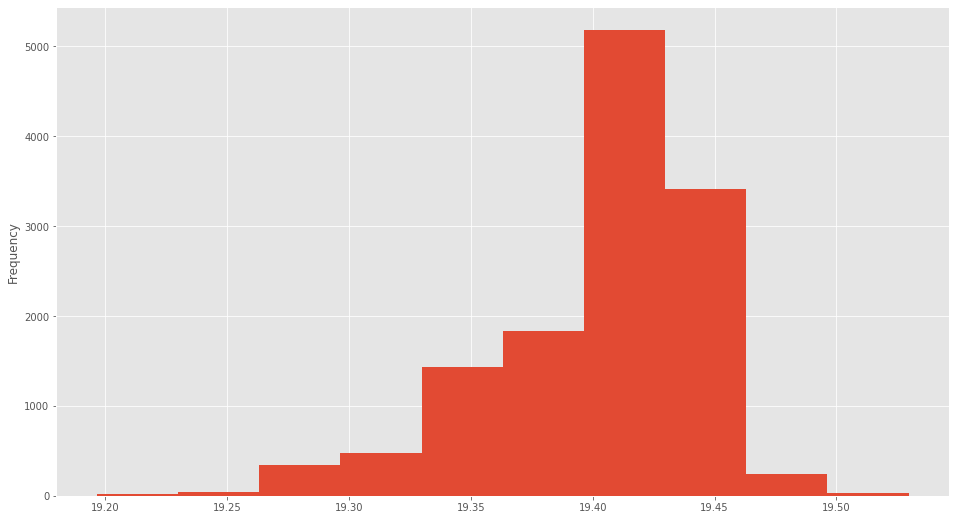

In [ ]:
ds.latitude.plot(kind='hist')

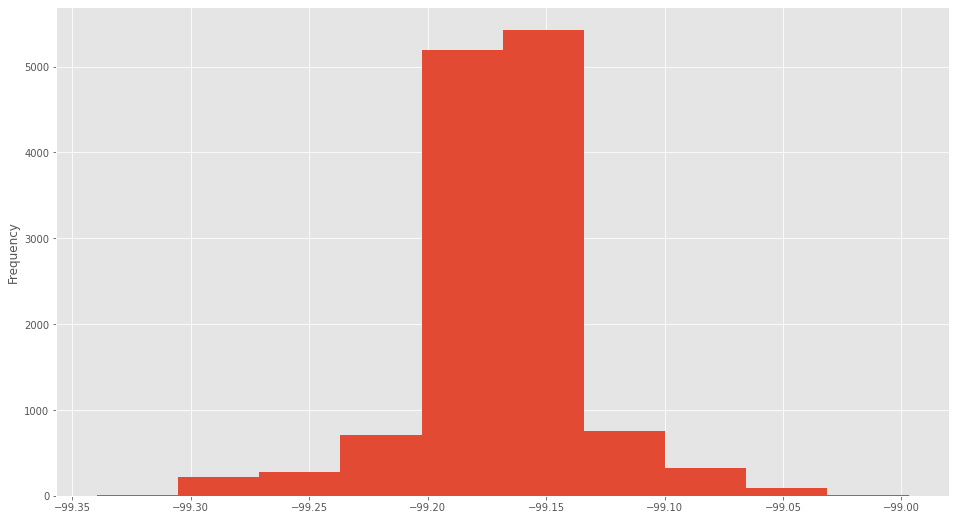

In [ ]:
ds.longitude.plot(kind='hist')

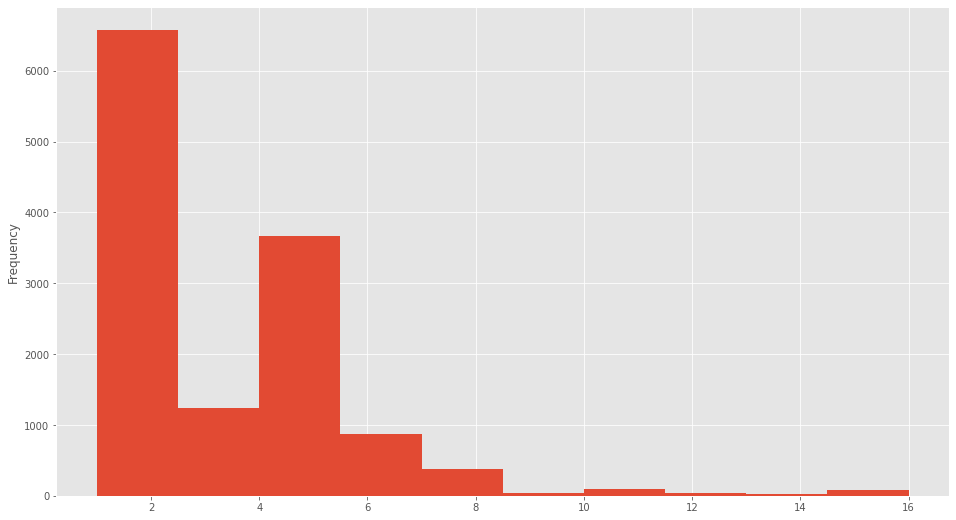

In [ ]:
ds.accommodates.plot(kind='hist')

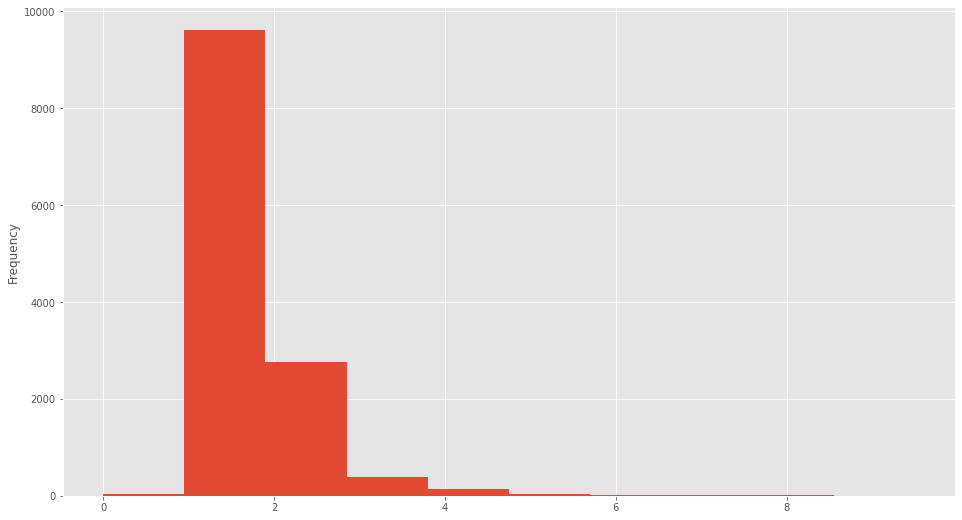

In [ ]:
ds.bathrooms.plot(kind='hist')

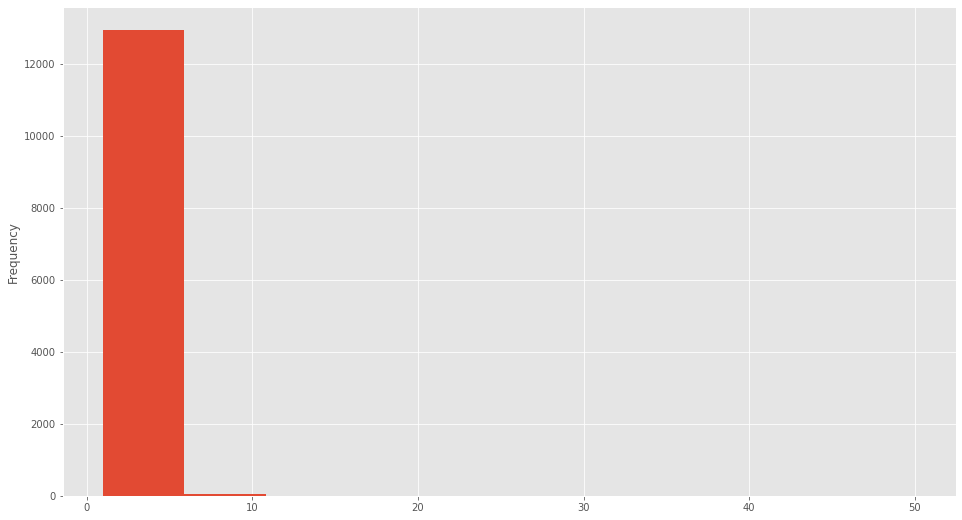

In [ ]:
ds.bedrooms.plot(kind='hist')

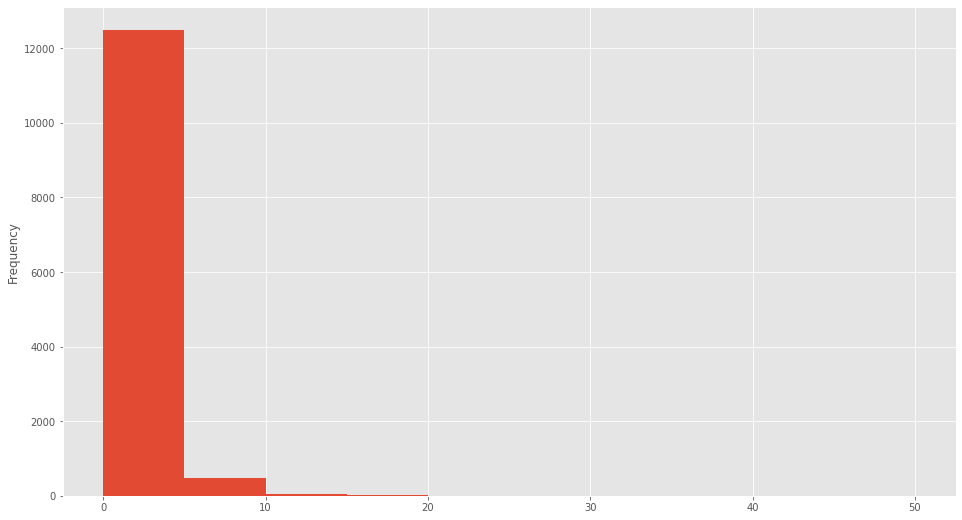

In [ ]:
ds.beds.plot(kind='hist')

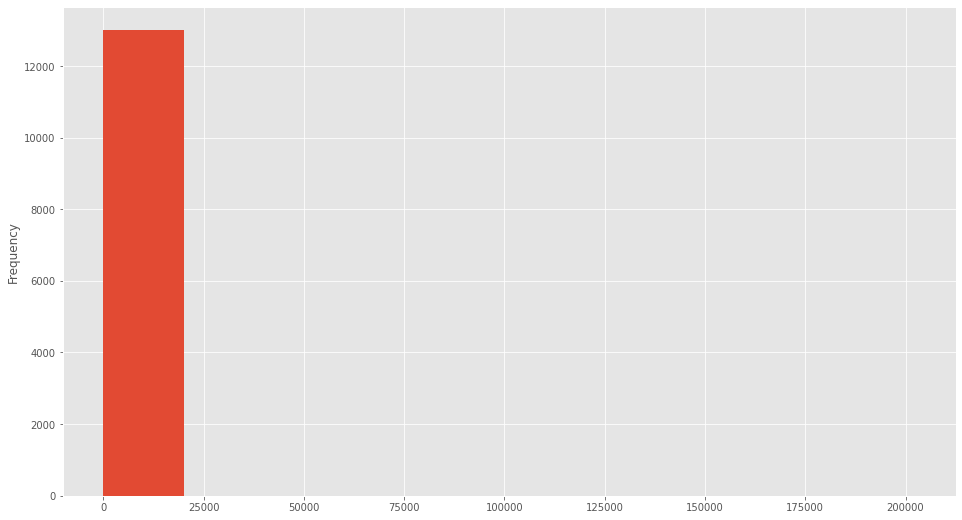

In [ ]:
ds.price.plot(kind='hist')

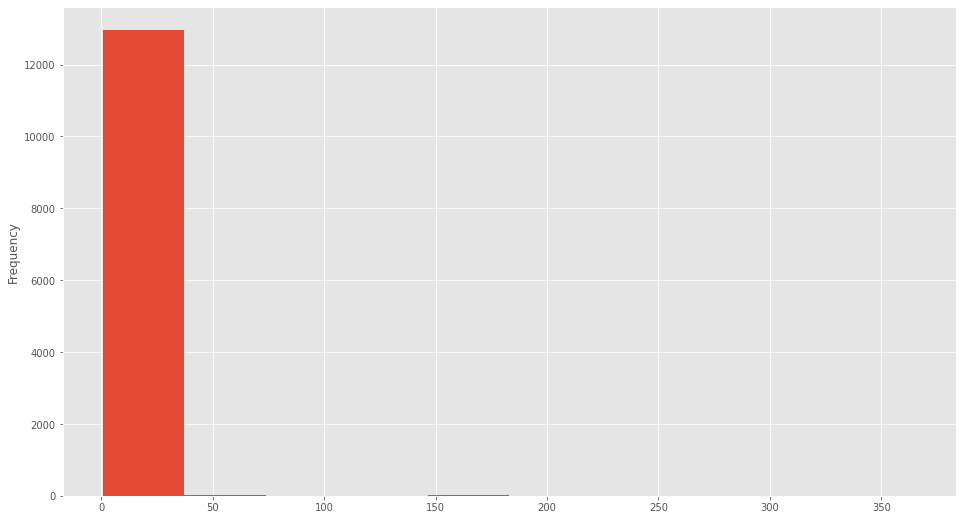

In [ ]:
ds.minimum_nights.plot(kind='hist')

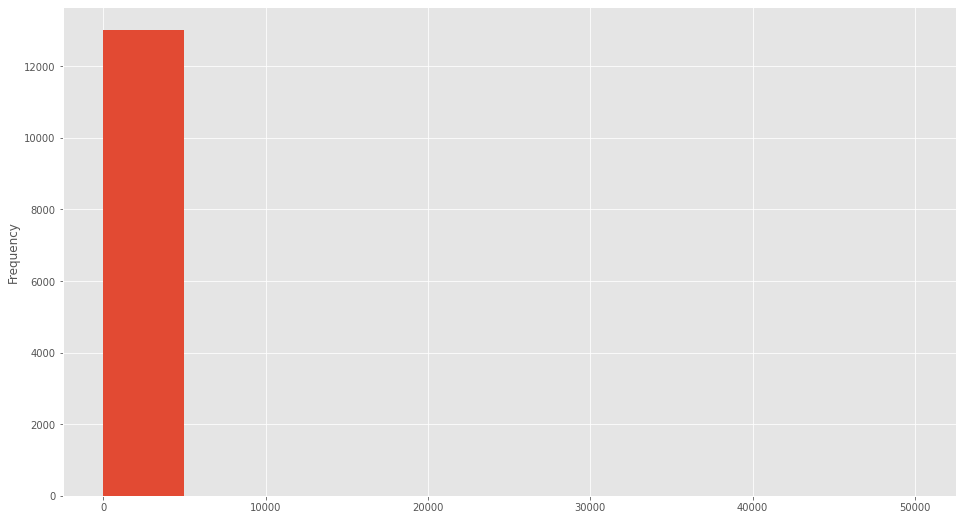

In [ ]:
ds.maximum_nights.plot(kind='hist')

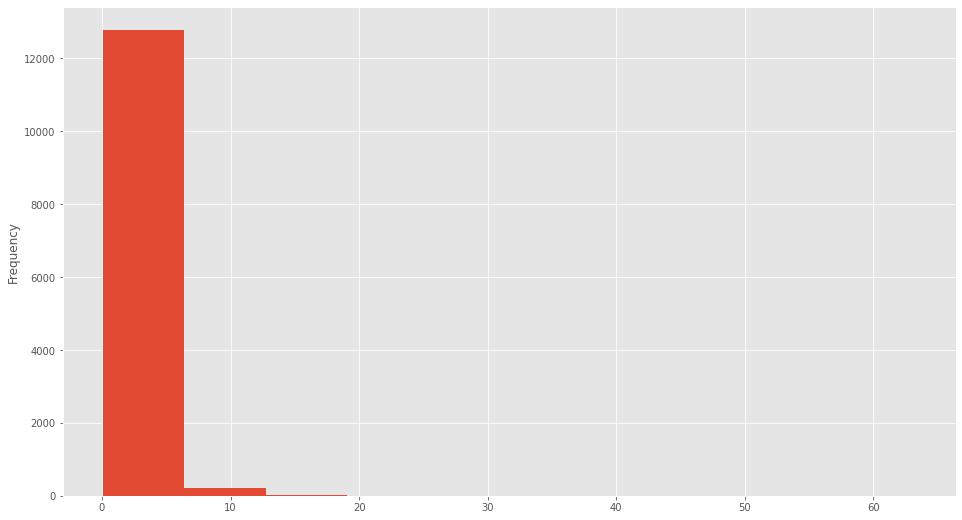

In [ ]:
ds.reviews_per_month.plot(kind='hist')

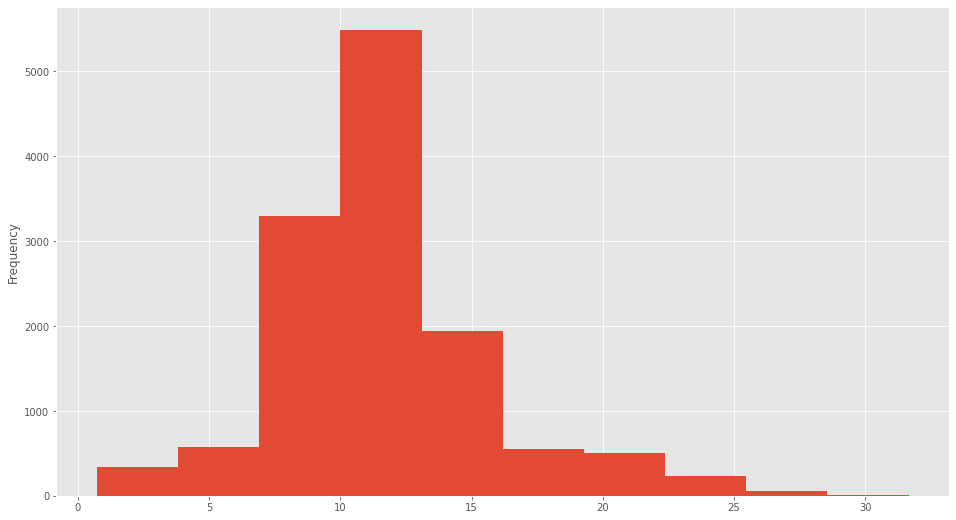

In [ ]:
ds.AirportD.plot(kind='hist')

In [ ]:
# Recuento de valores únicos de las entidades native_country
ds.room_type.value_counts()

Entire home/apt    8650
Private room       4239
Shared room         122
Name: room_type, dtype: int64

In [ ]:
ds.amenities.value_counts()

["Carbon monoxide alarm", "Stove", "Elevator", "Heating", "Extra pillows and blankets", "Dryer", "Cooking basics", "Cable TV", "Dishes and silverware", "Coffee maker", "Microwave", "Building staff", "Washer", "Iron", "Shampoo", "Essentials", "Smoke alarm", "Hair dryer", "Wifi", "Oven", "Free parking on premises", "Private entrance", "Long term stays allowed", "Luggage dropoff allowed", "Fire extinguisher", "Baking sheet", "Shower gel", "First aid kit", "Hot water", "Refrigerator", "Kitchen", "Bed linens", "Patio or balcony", "Hangers", "TV with standard cable"]    19
["Iron", "Shampoo", "Free parking on premises", "Gym", "Carbon monoxide alarm", "Building staff", "Long term stays allowed", "Essentials", "Smoke alarm", "Hair dryer", "Dryer", "Pool", "Wifi", "Hot water", "Kitchen", "Dedicated workspace", "Washer", "TV", "Hangers"]                                                                                                                                                                

In [ ]:
ds.Wifi.value_counts()

True     12893
False      118
Name: Wifi, dtype: int64

In [ ]:
ds.TV.value_counts()

True     10616
False     2395
Name: TV, dtype: int64

In [ ]:
ds.Parking.value_counts()

True     10144
False     2867
Name: Parking, dtype: int64

In [ ]:
ds.Kitchen.value_counts()

True     11583
False     1428
Name: Kitchen, dtype: int64

In [ ]:
ds.Washer.value_counts()

True     7121
False    5890
Name: Washer, dtype: int64

In [ ]:
ds.Refrigerator.value_counts()

True     8752
False    4259
Name: Refrigerator, dtype: int64

In [ ]:
print(ds[cuali].nunique(),
      'There are',sum(ds[cuali].nunique()), 'groups in the whole dataset')


room_type       3
Wifi            2
TV              2
Parking         2
Kitchen         2
Washer          2
Refrigerator    2
dtype: int64 There are 15 groups in the whole dataset


In [ ]:
# unique () devuelve los valores únicos de las entidades categóricas.
for i in cuali:
    print(ds[i].unique())


['Entire home/apt' 'Private room' 'Shared room']
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]


In [ ]:
# Box-CoX
ds["price"], lamb = stats.boxcox(ds['price'])[0:2]
print(lamb)
X_train, X_test, y_train, y_test = train_test_split(ds[[ 'room_type', 'accommodates', 'bathrooms',
           'bedrooms', 'beds',  'minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD', 'Wifi', 'TV', 'Parking','Kitchen', 'Washer', 'Refrigerator']],
                                                    ds['price'],
                                                    test_size = 0.1,
                                                    random_state=0)
X_train.head(5)
print(X_train.shape, X_test.shape)


-0.18271461473739664
(11709, 15) (1302, 15)


In [ ]:
# Conocer el indice se las variables continuas
cuantiindex = []
for i in cuanti:
#    position = df_train.columns.get_loc(i)
    position = X_train.columns.get_loc(i)
    cuantiindex.append(position)
print(cuantiindex)


[1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
# Conocer el indice se las variables categóricas
cualiindex = []
for i in cuali:
#    position = df_train.columns.get_loc(i)
    position = X_train.columns.get_loc(i)
    cualiindex.append(position)
print(cualiindex)


[0, 9, 10, 11, 12, 13, 14]


In [ ]:
# El objeto OneHotEncoder dentro de make_column_transformer codifica
# automáticamente la etiqueta.
preprocess = make_column_transformer(
    (OneHotEncoder(categories='auto'), cualiindex), 
    remainder="passthrough")
#X_test.shape, X_train.shape

preprocess.fit_transform(X_train).shape


(11709, 23)

In [ ]:
# Conocer la forma de la nueva matriz
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.fit_transform(X_test)
model = LinearRegression()


In [ ]:
# modelo de regresión
model.fit(X_train, y_train)
print("Score regresión lineal: %f" % model.score(X_test, y_test))
print('Coeficientes: ', model.coef_)


Score regresión lineal: 0.505271
Coeficientes:  [ 1.91221311e-01 -6.44619414e-03 -1.84775117e-01 -2.41544053e-02
  2.41544053e-02 -3.27826206e-02  3.27826206e-02  2.95201689e-03
 -2.95201689e-03  2.20144513e-02 -2.20144513e-02 -1.44251086e-02
  1.44251086e-02  5.36804854e-03 -5.36804854e-03  2.57562836e-02
  5.51693854e-02  1.16644345e-02 -1.41531379e-02 -1.83878004e-04
  2.38841154e-06  1.28168034e-03  3.12039344e-03]


In [ ]:
# coeficiente de determinación de R^2
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


0.5052710418032019

In [ ]:
# creamos un dataframe con los valores actuales y los de predicción
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred})
# elegimos una muestra con 25 valores 
muestra_validacion = validacion.head(25)
# desplegamos esos 25 valores 
muestra_validacion


,Actual,Predicción,Diferencia
4500,3.771317,3.896042,-0.124725
4657,3.594378,3.623666,-0.029288
3795,3.899810,3.898748,0.001062
4231,3.859439,3.687558,0.171881
2943,3.893793,3.579815,0.313978
4063,4.072565,4.061894,0.010671
2640,3.893793,3.728628,0.165165
11956,3.536798,3.685747,-0.148949
7809,4.224039,4.058583,0.165456
2579,3.816547,3.944740,-0.128193


In [ ]:
# Estadística descriptiva de residuos
validacion["Diferencia"].describe()

count    1302.000000
mean       -0.001825
std         0.150975
min        -0.495897
25%        -0.104032
50%        -0.008784
75%         0.093069
max         0.826333
Name: Diferencia, dtype: float64

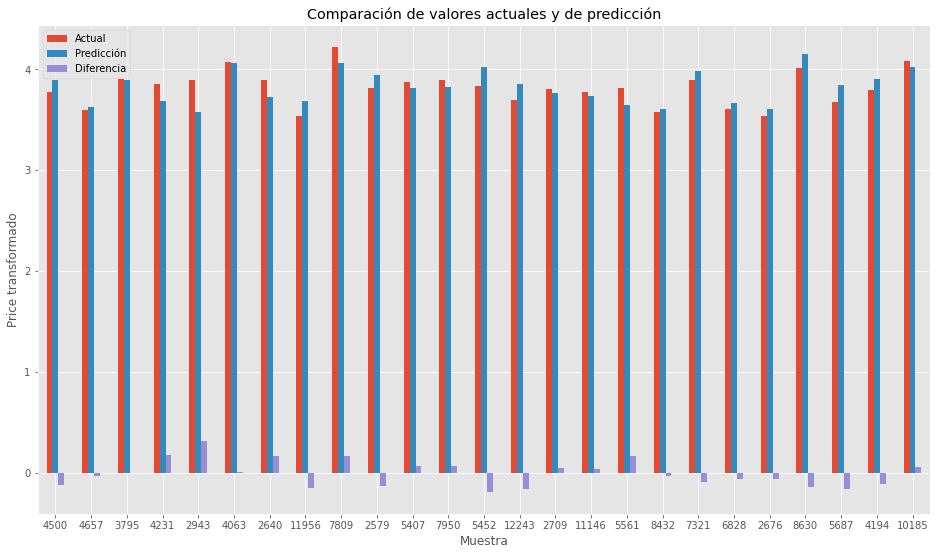

In [ ]:
#creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción
muestra_validacion.plot.bar(rot=0)
# indicamos el título del gráfico
plt.title("Comparación de valores actuales y de predicción")
# indicamos la etiqueta del eje de las x, los alimentos
plt.xlabel("Muestra")
# indicamos la etiqueta del eje de las y, la cantidad de calorías
plt.ylabel("Price transformado")
# desplegamos el gráfico
plt.show()


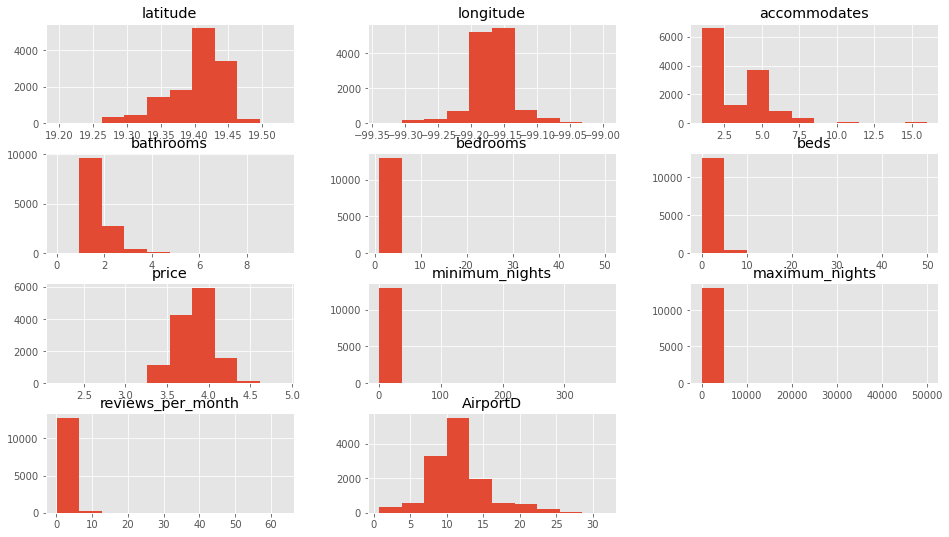

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
ds.drop(cuali,1).hist()
plt.show()


In [ ]:
# Aplicar tranformación BoxCox    
#Transformamos toda la tabla
del ds["latitude"]
del ds["longitude"]
del ds["amenities"]
#from scipy import stats
ds_fix = pd.DataFrame()
ds_fix = ds
ds_fix["price"] = stats.boxcox(ds_fix['price'])[0]
#ds_fix["accommodates"] = stats.boxcox(ds_fix['accommodates'])[0]
#ds_fix["bathrooms"] = stats.boxcox(ds_fix['bathrooms'])[0]
#ds_fix["AirportD"] = stats.boxcox(ds_fix['AirportD'])[0]
ds_fix.head()


,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,reviews_per_month,AirportD,Wifi,TV,Parking,Kitchen,Washer,Refrigerator
0,Entire home/apt,14.0,5.5,5.0,8.0,3.598141,1.0,365.0,4.26,11.456566,True,True,True,True,True,True
1,Entire home/apt,2.0,1.0,1.0,1.0,2.684904,2.0,250.0,0.52,8.841674,True,True,True,True,False,True
2,Entire home/apt,2.0,1.5,1.0,1.0,3.101610,7.0,90.0,0.81,9.348214,True,False,True,True,False,True
3,Entire home/apt,4.0,1.0,2.0,3.0,3.154566,4.0,30.0,0.33,10.505967,True,True,False,True,True,True
4,Entire home/apt,2.0,1.0,1.0,1.0,2.947768,4.0,180.0,1.17,13.093206,True,True,True,True,True,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ds_fix[[ 'room_type', 'accommodates', 'bathrooms',
           'bedrooms', 'beds',  'minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD', 'Wifi', 'TV', 'Parking','Kitchen', 'Washer', 'Refrigerator']],
                                                    ds_fix['price'],
                                                    test_size = 0.1,
                                                    random_state=0)
X_train.head(5)
print(X_train.shape, X_test.shape)


(11709, 15) (1302, 15)


In [ ]:
# El objeto OneHotEncoder dentro de make_column_transformer codifica
# automáticamente la etiqueta.
preprocess = make_column_transformer(
    (OneHotEncoder(categories='auto'), cualiindex), 
    remainder="passthrough")
#X_test.shape, X_train.shape

preprocess.fit_transform(X_train).shape


(11709, 23)

In [ ]:
# Conocer la forma de la nueva matriz
#model = make_pipeline(
#    preprocess,
#    LinearRegression())
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.fit_transform(X_test)
#X_train.shape()
#model = LinearRegression()
X_train.shape, X_test.shape


((11709, 23), (1302, 23))

In [ ]:
# Correlación entre columnas numéricas
'''
Para convertir una matriz de correlación de pandas en formato tidy
'''
corr_matrix = ds_fix.select_dtypes(include=['float64', 'int']).corr(method='pearson')

corr_mat = corr_matrix.stack().reset_index()
corr_mat.columns = ['variable_1','variable_2','r']
corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
corr_mat['abs_r'] = np.abs(corr_mat['r'])
corr_mat = corr_mat.sort_values('abs_r', ascending=False)

corr_mat.head(10)


,variable_1,variable_2,r,abs_r
3,accommodates,beds,0.768058,0.768058
27,beds,accommodates,0.768058,0.768058
21,bedrooms,beds,0.746589,0.746589
29,beds,bedrooms,0.746589,0.746589
2,accommodates,bedrooms,0.666047,0.666047
18,bedrooms,accommodates,0.666047,0.666047
1,accommodates,bathrooms,0.556743,0.556743
9,bathrooms,accommodates,0.556743,0.556743
19,bedrooms,bathrooms,0.519745,0.519745
11,bathrooms,bedrooms,0.519745,0.519745


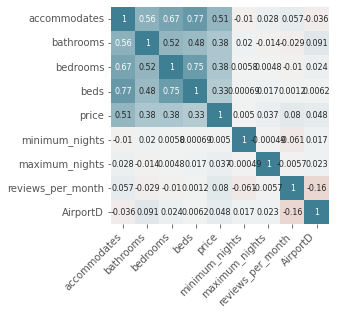

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


In [ ]:
#ELIMINAMOS LAS DE CORRELACION BEDROOMS Y BEDS
del ds["bedrooms"]
del ds["beds"]
X_train, X_test, y_train, y_test = train_test_split(ds_fix[[ 'room_type', 'accommodates', 'bathrooms', 'minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD', 'Wifi', 'TV', 'Parking','Kitchen', 'Washer', 'Refrigerator']],
                                                    ds_fix['price'],
                                                    test_size = 0.1,
                                                    random_state=0)
X_train.head(5)
print(X_train.shape, X_test.shape)

(11709, 13) (1302, 13)


In [ ]:
cuanti  = [ 'accommodates', 'bathrooms','minimum_nights', 'maximum_nights', 'reviews_per_month','AirportD']

In [ ]:
# Conocer el indice se las variables continuas
cuantiindex = []
for i in cuanti:
#    position = df_train.columns.get_loc(i)
    position = X_train.columns.get_loc(i)
    cuantiindex.append(position)
print(cuantiindex)

[1, 2, 3, 4, 5, 6]


In [ ]:
# Conocer el indice se las variables categóricas
cualiindex = []
for i in cuali:
#    position = df_train.columns.get_loc(i)
    position = X_train.columns.get_loc(i)
    cualiindex.append(position)
print(cualiindex)

[0, 7, 8, 9, 10, 11, 12]


In [ ]:
# El objeto OneHotEncoder dentro de make_column_transformer codifica
# automáticamente la etiqueta.
preprocess = make_column_transformer(
    (OneHotEncoder(categories='auto'), cualiindex), 
    remainder="passthrough")
#X_test.shape, X_train.shape

preprocess.fit_transform(X_train).shape

(11709, 21)

In [ ]:
# Conocer la forma de la nueva matriz
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.fit_transform(X_test)
model = LinearRegression()


In [ ]:
# modelo de regresión
model.fit(X_train, y_train)
print("Score regresión lineal: %f" % model.score(X_test, y_test))
print('Coeficientes: ', model.coef_)

Score regresión lineal: 0.498923
Coeficientes:  [ 2.05229915e-01 -1.43461374e-03 -2.03795301e-01 -2.41421750e-02
  2.41421750e-02 -3.43190199e-02  3.43190199e-02  2.89675214e-03
 -2.89675214e-03  2.27762373e-02 -2.27762373e-02 -1.51248322e-02
  1.51248322e-02  5.64043513e-03 -5.64043513e-03  2.10262731e-02
  5.84938531e-02 -1.97346458e-04  2.30241118e-06  1.41512103e-03
  3.10178284e-03]


In [ ]:
# coeficiente de determinación de R^2
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.49892323481031553

In [ ]:
# creamos un dataframe con los valores actuales y los de predicción
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred})
# elegimos una muestra con 25 valores 
muestra_validacion = validacion.head(25)
# desplegamos esos 25 valores 
muestra_validacion


,Actual,Predicción,Diferencia
4500,2.818223,2.957756,-0.139533
4657,2.636427,2.667734,-0.031307
3795,2.950355,2.951382,-0.001027
4231,2.908831,2.732553,0.176278
2943,2.944166,2.617072,0.327095
4063,3.128146,3.103579,0.024567
2640,2.944166,2.789123,0.155043
11956,2.577306,2.720339,-0.143033
7809,3.284164,3.104076,0.180088
2579,2.864724,2.990582,-0.125858


In [ ]:
# Estadística descriptiva de residuos
validacion["Diferencia"].describe()

count    1302.000000
mean       -0.001987
std         0.156235
min        -0.578215
25%        -0.105153
50%        -0.008184
75%         0.092269
max         0.861648
Name: Diferencia, dtype: float64

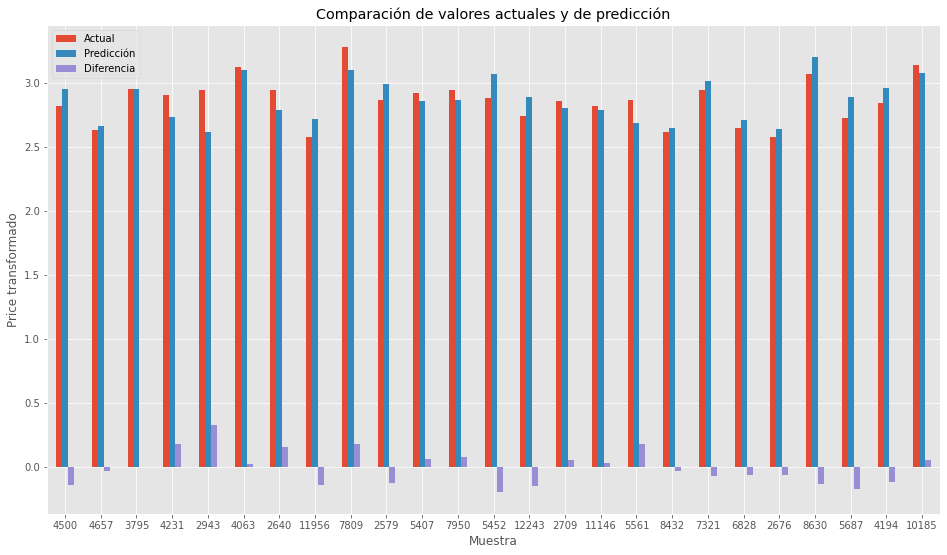

In [ ]:
#creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción
muestra_validacion.plot.bar(rot=0)
# indicamos el título del gráfico
plt.title("Comparación de valores actuales y de predicción")
# indicamos la etiqueta del eje de las x, los alimentos
plt.xlabel("Muestra")
# indicamos la etiqueta del eje de las y, la cantidad de calorías
plt.ylabel("Price transformado")
# desplegamos el gráfico
plt.show()

In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
prediccion_train = model.predict(X_train)
residuos_train   = prediccion_train - y_train


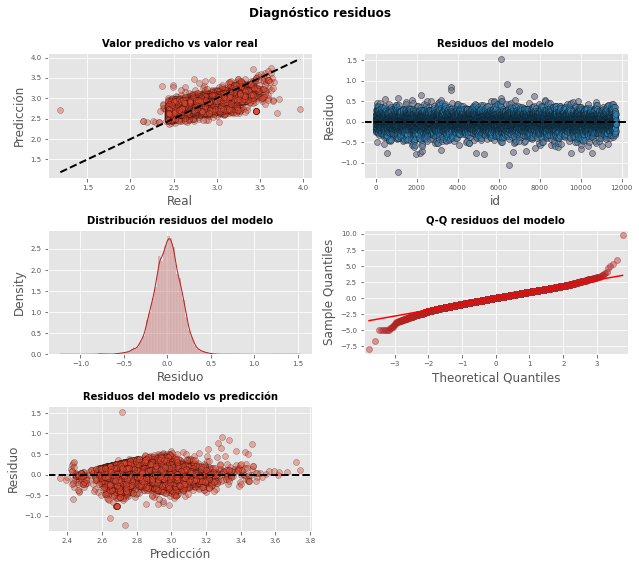

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)
axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)
axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
